### Mission: 고급 차트 유형에서 제시한 5개 시각화 방법 사용해보기

In [2]:
! kaggle datasets download -d park123/korea-baseball-datasetkbo-20152020

Dataset URL: https://www.kaggle.com/datasets/park123/korea-baseball-datasetkbo-20152020
License(s): unknown
korea-baseball-datasetkbo-20152020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! kaggle datasets download -d park123/korea-baseball-datasetkbo-20152020

In [3]:
! unzip /content/korea-baseball-datasetkbo-20152020.zip

Archive:  /content/korea-baseball-datasetkbo-20152020.zip
  inflating: baseball_2015.csv       
  inflating: baseball_2016.csv       
  inflating: baseball_2017.csv       
  inflating: baseball_2018.csv       
  inflating: baseball_2019.csv       
  inflating: baseball_2020.csv       


In [5]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
data = pd.read_csv('/content/baseball_2020.csv')
data

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,...,HP,KK,GD,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,OBP,OOO,win
0,20200505HHSK0,20200505,HH,SK,0,T,35.0,31.0,3.0,3.0,...,0.0,5.0,1.0,13.0,0.250000,8,2,0.303030,0.258065,1.0
1,20200505HHSK0,20200505,SK,HH,0,B,30.0,29.0,0.0,0.0,...,0.0,2.0,0.0,3.0,0.000000,1,0,0.100000,0.068966,0.0
2,20200505LTKT0,20200505,LT,KT,0,T,37.0,32.0,7.0,7.0,...,0.0,9.0,1.0,6.0,0.666667,3,2,0.297297,0.218750,1.0
3,20200505LTKT0,20200505,KT,LT,0,B,35.0,30.0,2.0,2.0,...,0.0,8.0,1.0,12.0,0.000000,4,0,0.285714,0.166667,0.0
4,20200505NCSS0,20200505,NC,SS,0,T,35.0,33.0,4.0,4.0,...,0.0,9.0,0.0,6.0,0.333333,3,1,0.257143,0.212121,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,20201018LTNC0,20201018,NC,LT,0,B,37.0,33.0,2.0,2.0,...,1.0,12.0,1.0,16.0,0.166667,6,1,0.324324,0.242424,0.0
1364,20201018OBWO0,20201018,OB,WO,0,T,43.0,39.0,7.0,8.0,...,2.0,6.0,2.0,22.0,0.333333,12,4,0.395349,0.333333,1.0
1365,20201018OBWO0,20201018,WO,OB,0,B,34.0,33.0,2.0,2.0,...,1.0,10.0,0.0,9.0,0.166667,6,1,0.205882,0.181818,0.0
1366,20201018SSHH0,20201018,SS,HH,0,T,38.0,33.0,5.0,5.0,...,0.0,6.0,0.0,16.0,0.272727,11,3,0.297297,0.212121,1.0


- TB_SC : T : AWAY, B : BASE
- RUN : Score
- OBP : On-Base Rate
- OOO : Batting Average
- win : 0 : Loss, 1 : Win, 0.5 : Draw

- TEAM
- HH : 한화
- HT : 기아
- KT : KT
- LG : LG
- LT : 롯데
- NC : NC
- OB : 두산
- SK : SK
- SS : 삼성
- WO : 키움

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       1368 non-null   object 
 1   GDAY_DS    1368 non-null   int64  
 2   T_ID       1368 non-null   object 
 3   VS_T_ID    1368 non-null   object 
 4   HEADER_NO  1368 non-null   int64  
 5   TB_SC      1368 non-null   object 
 6   PA         1368 non-null   float64
 7   AB         1368 non-null   float64
 8   RBI        1368 non-null   float64
 9   RUN        1368 non-null   float64
 10  HIT        1368 non-null   float64
 11  H2         1368 non-null   int64  
 12  H3         1368 non-null   int64  
 13  HR         1368 non-null   float64
 14  SB         1368 non-null   int64  
 15  CS         1368 non-null   int64  
 16  SF         1368 non-null   int64  
 17  BB         1368 non-null   float64
 18  HP         1368 non-null   float64
 19  KK         1368 non-null   float64
 20  GD      

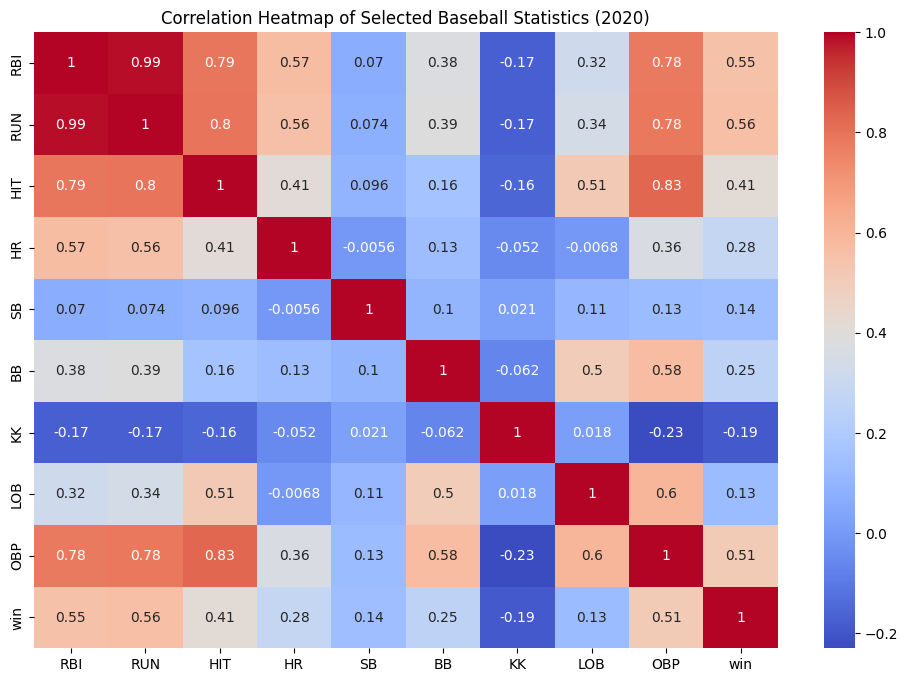

In [8]:
# 데이터 생성
selected_data = data[['RBI', 'RUN', 'HIT', 'HR', 'SB', 'BB', 'KK', 'LOB', 'OBP', 'win']]
correlation_matrix = selected_data.corr()

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Baseball Statistics (2020)')
plt.show()

- RBI와 RUN (0.988): 이는 타점이 높을수록 득점도 높다는 것을 의미합니다.
- HIT와 OBP (0.829): 이는 안타 수가 많을수록 출루율도 높다는 것을 의미합니다.
- RUN과 OBP (0.784): 이는 출루율이 높을수록 득점도 높다는 것을 의미합니다.
- RBI와 OBP (0.779): 이는 출루율이 높을수록 타점도 높다는 것을 의미합니다.

#### Tree Map

In [15]:
import plotly.express as px
import numpy as np

data.columns = ['country', 'population_2024', 'population_2023', 'area_km2', 'density_km2', 'growth_rate', 'world_percentage', 'world_rank']

fig = px.treemap(data, path=[px.Constant("world"), 'country'], values='population_2024',
                  color='growth_rate', hover_data=['world_rank'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(data['growth_rate'], weights=data['population_2024']))
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

### 버블차트(Bubble Chart)
- 하나의 경기에서의 총 타석수 만큼? 안타치는 횟수
- Size는 얼마나 타점이 나오는지

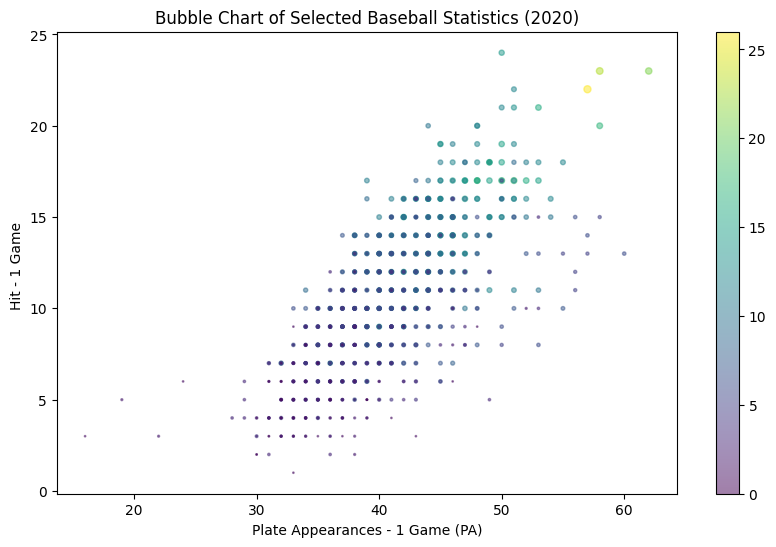

In [16]:
import matplotlib.pyplot as plt

# 샘플 데이터 정의
x = data['PA']  # 타석수
y = data['HIT']  # 안타
sizes = data['RBI'] # 타점

# 버블 차트 생성
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, alpha=0.5, c=sizes, cmap='viridis')
plt.title('Bubble Chart of Selected Baseball Statistics (2020)')
plt.xlabel('Plate Appearances - 1 Game (PA)')
plt.ylabel('Hit - 1 Game ')
plt.colorbar()
plt.show()

### Radar Graph
- 2020년 5월 5일 키움(WO) vs 기아(HT) 경기 - 키움 타자 성적
- BB (볼넷)
- Run (점수)
- HIT (안타)
- RBI (타점)
- HR (홈런)

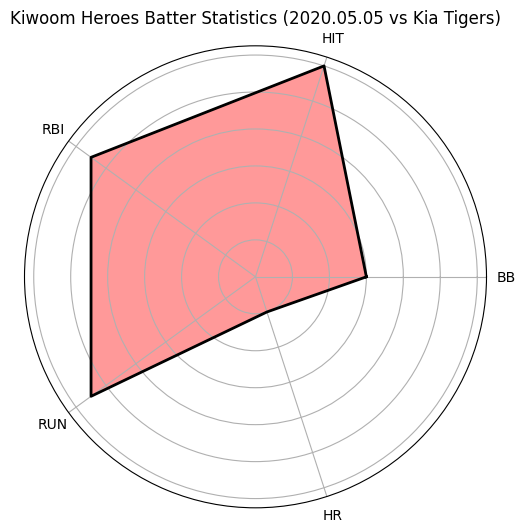

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 샘플 데이터 정의
labels = ['BB', 'HIT', 'RBI', 'RUN', 'HR']
values = [6.0, 12.0, 11.0, 11.0, 2.0]
values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# 레이더 차트 생성
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.4)
ax.plot(angles, values, color='black', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Kiwoom Heroes Batter Statistics (2020.05.05 vs Kia Tigers)')
plt.show()

### Sanky Diagram

Source (출발점):

- T_ID (팀 ID)
- PA (타석 수)
- Target (도착점):

- win (승리)
- RBI (타점)
- Value (값):

- RUN (득점)
- HIT (안타)
예를 들어, 팀별로 타석 수에 따른 득점의 흐름을 시각화

In [23]:
import plotly.graph_objects as go

# Sankey 다이어그램을 위한 소스와 타겟 인덱스 생성 (간단한 예시)
source = data['T_ID']
target = data['win']
values = data['RUN']

unique_teams = source.unique().tolist()
unique_results = target.unique().tolist()
all_nodes = unique_teams + unique_results

source_indices = source.apply(lambda x: all_nodes.index(x)).tolist()
target_indices = target.apply(lambda x: all_nodes.index(x)).tolist()

# Sankey 다이어그램 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"] * len(labels)
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

fig.update_layout(title_text="샘플 Sankey 다이어그램", font_size=10)
fig.show()

## 2. 시각화한 차트를 인터렉티브하게 만들어보기
- 2020.05.05 경기 (홈팀 기준)

In [26]:
import plotly.express as px
import pandas as pd

# 샘플 데이터 생성
data = {
    'Team': ['SK(H) vs 한화', '롯데(H) vs KT', '삼성(H) vs NC', '두산(H) vs LG', '키움(H) vs 기아'],
    'RBI': [0.0, 7.0, 0.0, 2.0, 11.0]
}
df = pd.DataFrame(data)

# 인터랙티브 선 그래프 생성
fig = px.line(df, x='Team', y='RBI', title='2020.05.05 KBO Home Team RBI Stat')
fig.show()

### 3. 지리 정보 데이터 시각화 해보기
- GeoPandas

In [27]:
!pip install geopandas

<ipython-input-28-88793399d62e>:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



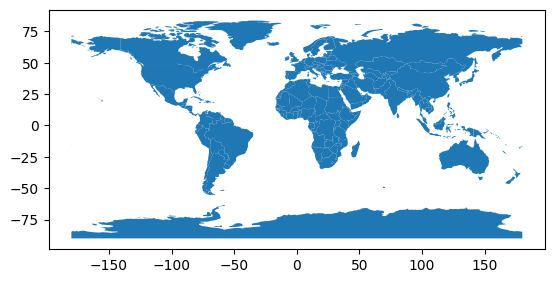

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 세계 지도 데이터를 로드합니다.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 데이터를 시각화합니다.
world.plot()
plt.show()

- Folium

In [29]:
!pip install folium

In [32]:
import folium

# 대화형 지도 생성
m = folium.Map(location=[20, 0], zoom_start=2)

# 지도에 마커 추가
folium.Marker([37.7749, -122.4194], popup='San Francisco').add_to(m)
folium.Marker([51.5074, -0.1278], popup='London').add_to(m)
folium.Marker([35.6895, 139.6917], popup='Tokyo').add_to(m)

# 지도를 HTML 파일로 저장
m.save('map.html')

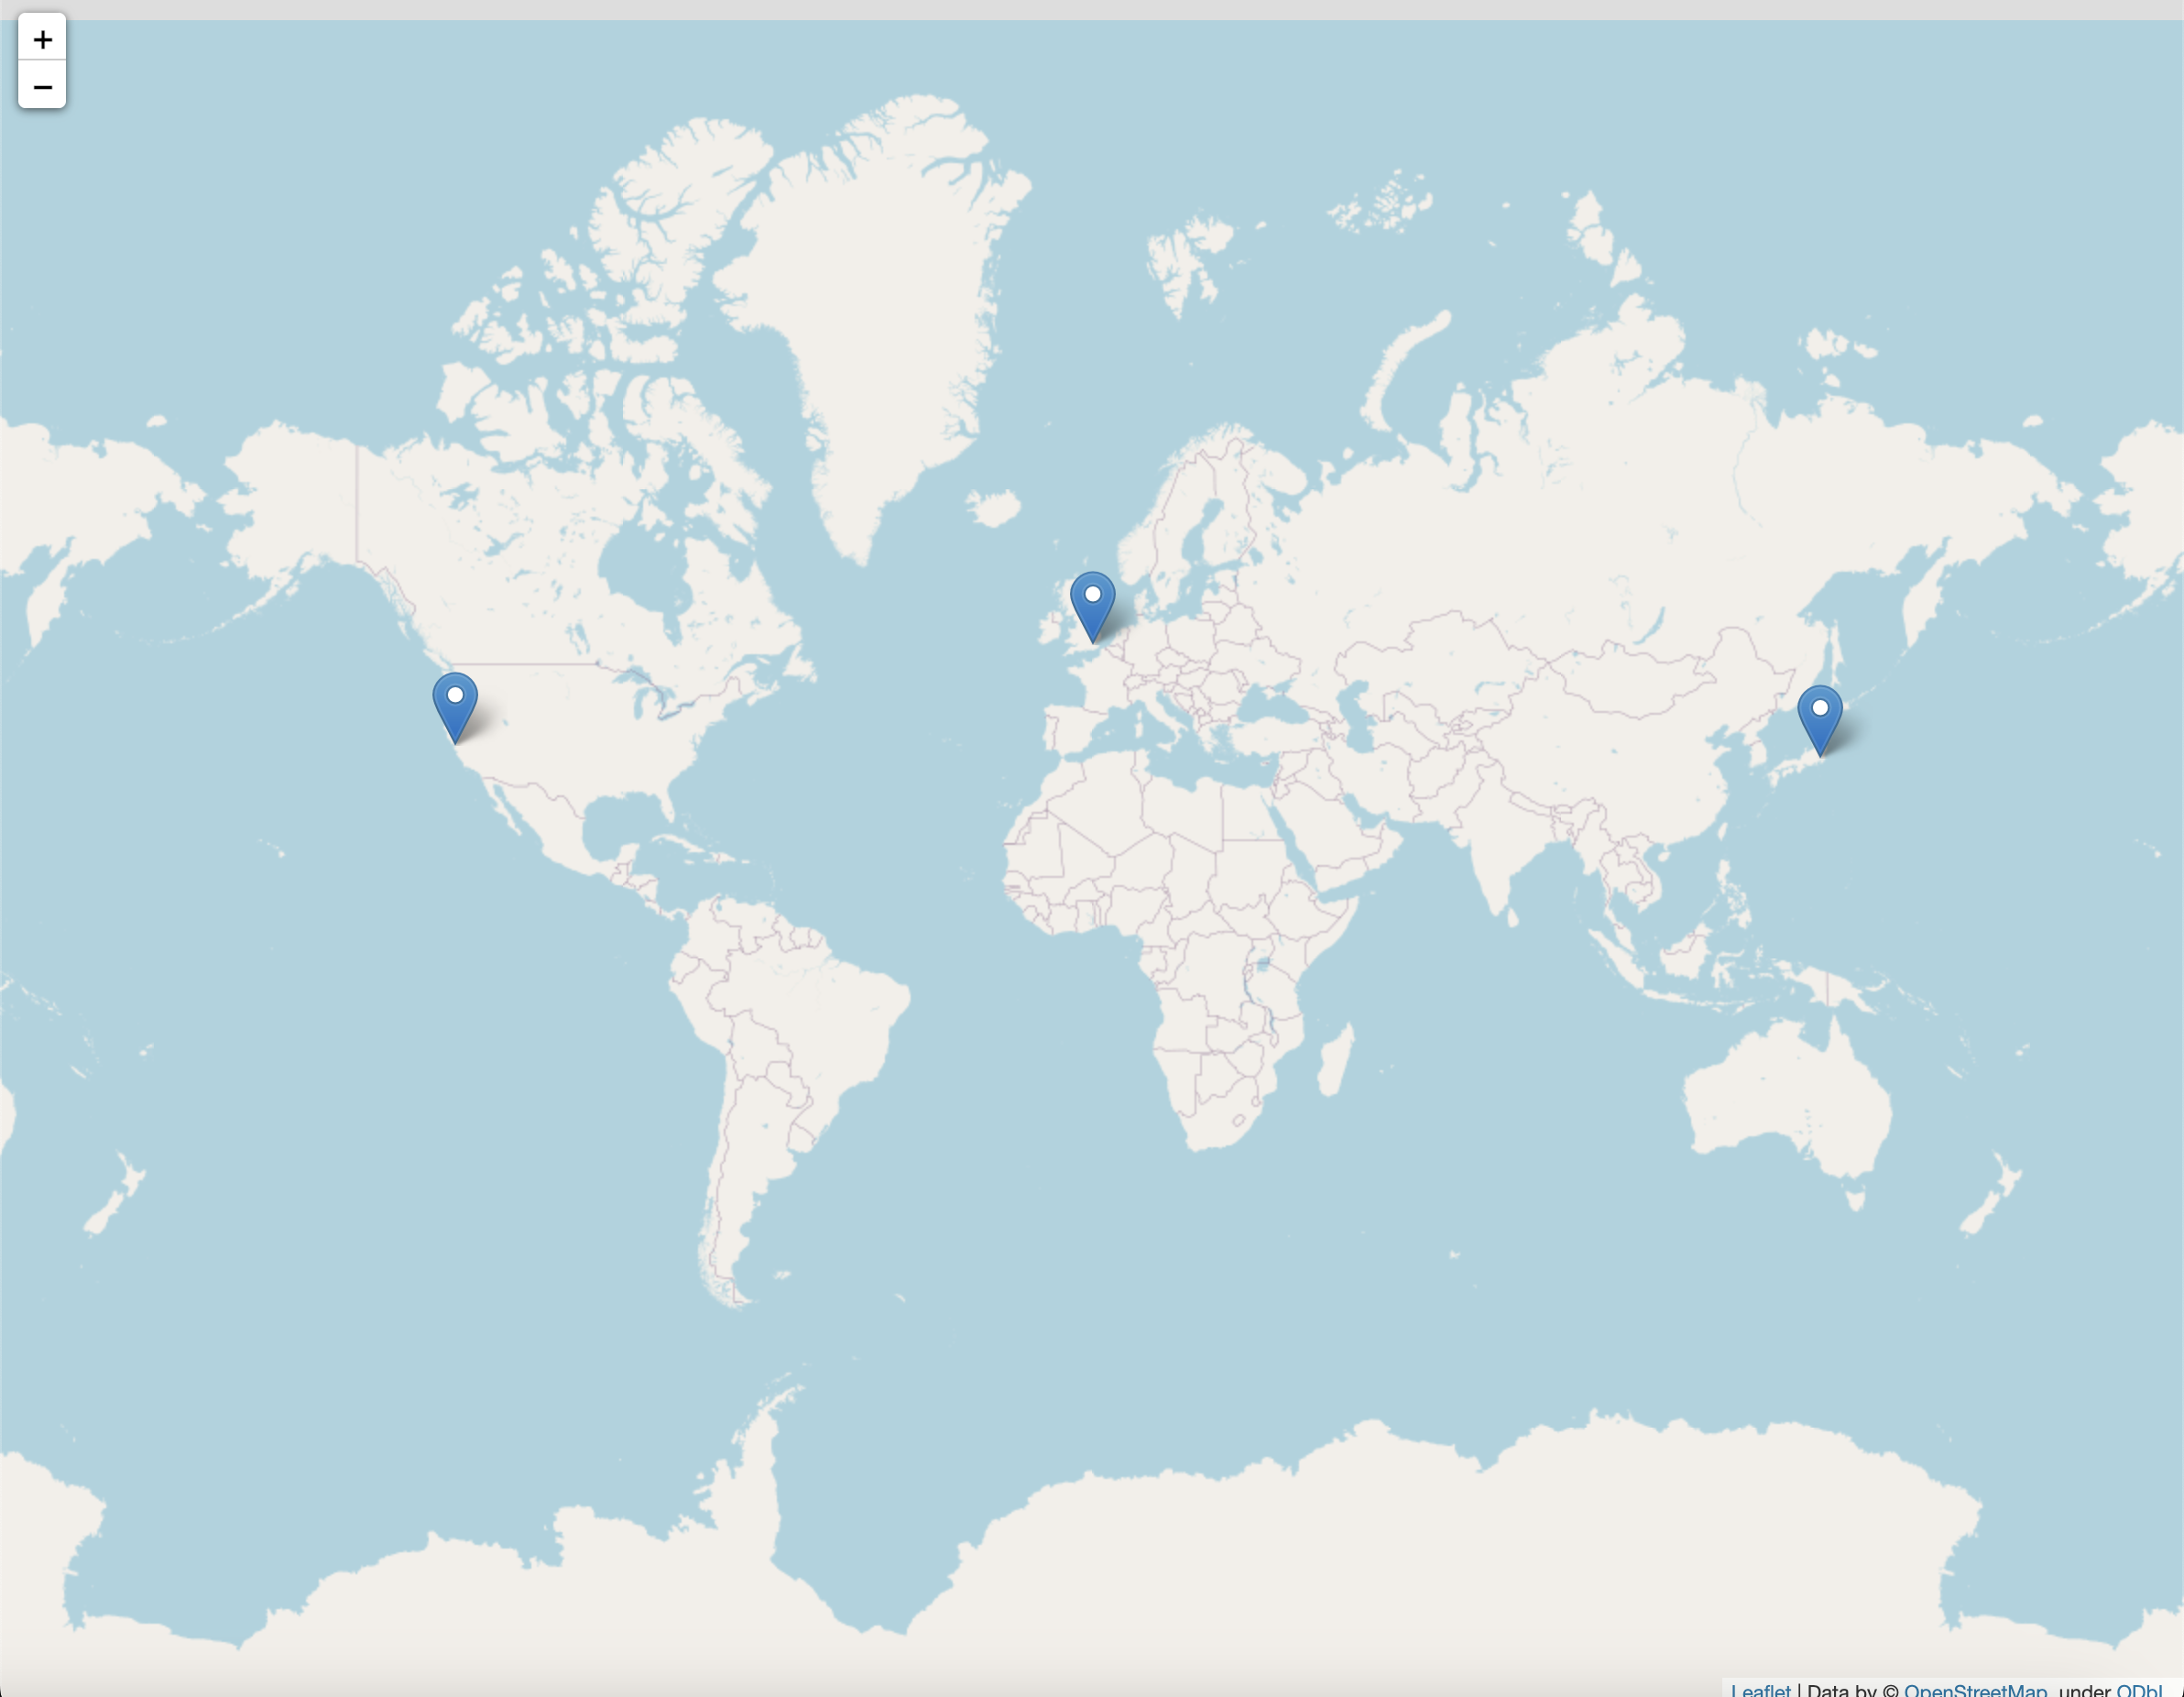